---

# Анализ данных в Pandas

---

Импортируем библиотеки и загрузим данные:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/avito_flats.csv', sep=';', index_col=0)
print(df.columns)

Index(['id', 'Город', 'Район', 'Улица', 'Геометка_дома', 'Тип_сделки',
       'Срок_аренды', 'Цена', 'Тип_дома', 'Количество_комнат', 'Общая_площадь',
       'Количество_этажей', 'Материал_стен', 'Тип_продажи', 'Дата',
       'Площадь_кухни', 'Жилая_площадь', 'Этаж'],
      dtype='object')


In [3]:
df['Цена'] = df['Цена'].str.replace(' ', '')
df = df.astype({'Цена': np.float64})

---

## 4 | Time Series

---

Давайте посмотрим на то, какие у нас даты есть в данных:

In [4]:
df['Дата'].unique()

array(['2021-03-16', '2021-03-24', '2021-03-23', 'too old', '2021-03-25',
       '2021-04-10', '2021-04-11', '2021-04-12'], dtype=object)

---

Если мы хотим посмотреть на динамику каких-то цен по этим данным, то сначала надо заменить поля 'too old' на что-то более осмысленное — например, на 2021-01-01:

In [5]:
df.loc[df['Дата'] == 'too old', 'Дата'] = '2021-01-01'
df = df.astype({'Дата': np.datetime64})
df['Дата'].unique()

array(['2021-03-16T00:00:00.000000000', '2021-03-24T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-03-25T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

---

И только теперь мы можем сгруппировать по времени цену и посмотреть на медиану:

In [6]:
time_price_median = df.groupby('Дата').agg({'Цена': 'median'})
time_price_median.head()

,Цена
Дата,
2021-01-01,7107629.0
2021-03-16,6116946.0
2021-03-23,6803541.0
2021-03-24,8004528.0
2021-03-25,7683975.0


---

Визуализировать такие данные просто — надо просто вызывать метод $\mathsf{plot}$:

<Axes: xlabel='Дата'>

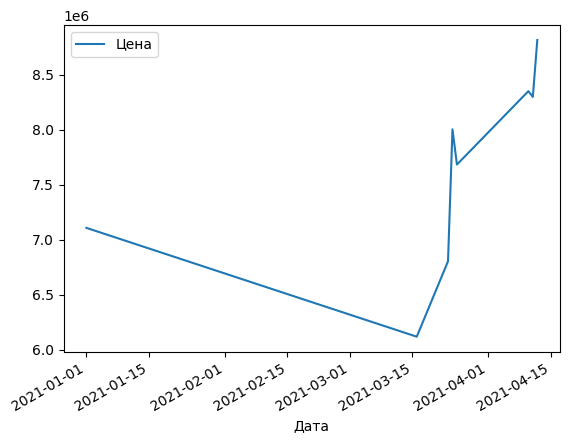

In [7]:
time_price_median.plot()

---

Давайте ещё поисследуем поведение каких-то значений при изменении времени. Для этого у нас есть датасет кофейни:

In [8]:
shops_df = pd.read_csv('/content/sample_data/coffee_shop_dynamic.csv', index_col=0)
shops_df.columns

Index(['date', 'shops_amount_delta', 'customers_amount', 'espresso',
       'americano', 'latte', 'cappuccino'],
      dtype='object')

Как мы видим, нам теперь для того, чтобы узнать прирост покупателей к какой-то дате, надо просуммировать все предыдущие добавки. Для этого есть метод $\mathsf{cumsum}$:

In [9]:
shops_df['shops_total'] = shops_df['shops_amount_delta'].cumsum()
shops_df = shops_df.drop('shops_amount_delta', axis=1)
shops_df[['date', 'customers_amount', 'shops_total']].head()

,date,customers_amount,shops_total
0,2018-11-30,103,1
1,2018-12-31,157,1
2,2019-01-31,245,1
3,2019-02-28,430,4
4,2019-03-31,432,3


А теперь перенесем дату в индексы и визуализируем:

array([[<Axes: xlabel='date'>],
       [<Axes: xlabel='date'>]], dtype=object)

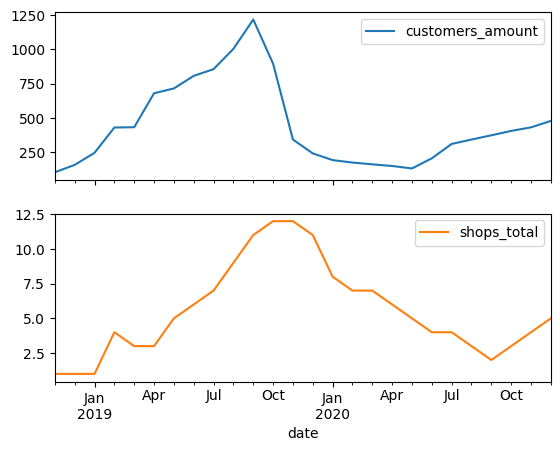

In [10]:
shops_df['date'] = pd.to_datetime(shops_df['date'])
shops_df = shops_df.set_index('date')
shops_df[['customers_amount', 'shops_total']] \
    .plot(subplots=True, layout=(2, 1))

---

### 4.1 | Сравнительные столбчатые диаграммы

---

А как нам можно посмотреть не глобальный прирос, а количество купленного кофе за каждую из дат? Для этого есть функция $\mathsf{plot.bar}$:

<Axes: xlabel='date'>

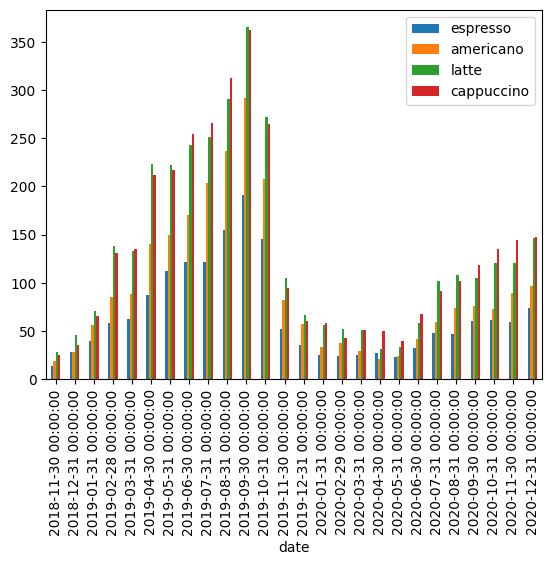

In [11]:
shops_df[['espresso', 'americano', 'latte', 'cappuccino']] \
    .plot.bar()

---

Также мы можем построить такой график не для каждой даты, а, например, суммарно для четырех месяцев. Для этого нам нужно сгруппировать данные по месяцам:

<Axes: xlabel='date'>

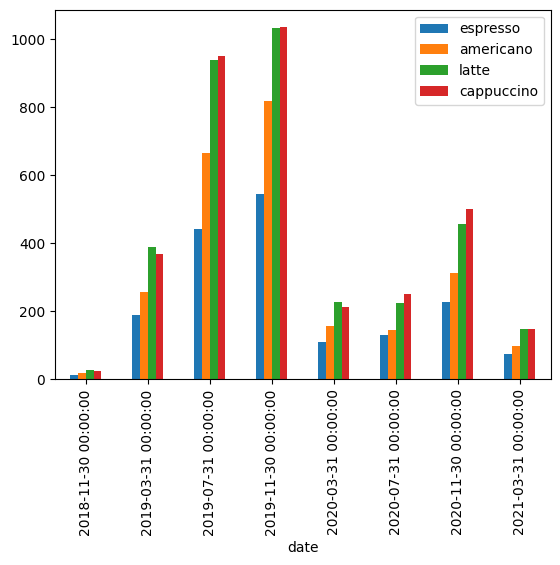

In [12]:
shops_df[['espresso', 'americano', 'latte', 'cappuccino']] \
    .groupby(pd.Grouper(freq='4M')).sum() \
    .plot.bar()